# [Get Rich or Buy Trying - Part 2](https://xpuzzlecorner.substack.com/p/get-rich-or-buy-trying-part-2)
## October 13, 2024

## Problem

_Consider the following stock behavior:_

_The stock’s value will change by a factor of (1+δ) from it’s pervious value each minute where δ is uniformly distributed from [-1/1000, 1/1000]. For example after two minutes, the value would be p_0 * δ_1 * δ_2._

_Your job is to determine the distribution of the value of the stock after 1 day. Assume the stock is traded for 7 hours a day (a bit off, I know)._

## Solution

We can model the stock value as a random variable $ Y = X_1 \cdot X_2 \cdot \ldots \cdot X_{420} $ where $ X_i $ is a random variable that is uniformly distributed from $[.999, 1.001]$. For a little added generality we use the following range of $ [a,b] $.

Taking inspiration from Springer's _The Algebra or Random Variables_ we can use the [Mellin transform](https://en.wikipedia.org/wiki/Mellin_transform). 

$$ \mathcal{M}\{f(x)\}(s) = \int_0^\infty x^{s-1} f(x) \, dx $$

where \( s \) is a complex number.

The Mellin transform obeys the following property:

$$ \mathcal{M}\{f(x_1)f(x_2)\} = \mathcal{M}\{f(x_1)\} \mathcal{M}\{f(x_2)\} $$

This will make computing the product of many random variables much easier. 

The Mellin transform also have an inverse:

$$ \mathcal{M}^{-1}\{F(s)\}(x) = \frac{1}{2\pi i} \int_{c-i\infty}^{c+i\infty} x^{-s} F(s) \, ds $$
where \( c \) is a real number.

Retrurning to our problem we can compute the distribution of the stock value as follows.

$$ \mathcal{M}\{f(x_1)f(x_2) \cdots f(x_{420})\} = \mathcal{M}\{f(x_1)\} \cdot \mathcal{M}\{f(x_2)\} \cdots \mathcal{M}\{f(x_{420})\} = \mathcal{M}\{f(x_i)\}^{420} $$

Since $ f(x_i) = \frac{1}{b-a} $ for $ x_i \in [a, b] $ we have

$$ \displaystyle \mathcal{M}\{f(x_i)\} = \int_0^\infty x^{s-1} f(x_i) \, dx_i = \int_a^b x^{s-1} \frac{1}{b-a} \, dx_i = \frac{1}{b-a} \frac{1}{s} \left[ x^s \right]_a^b = \frac{1}{b-a} \frac{b^s - a^s}{s} = \frac{b^s - a^s}{s(b-a)} $$

$$ \displaystyle \mathcal{M}\{f(x_i)\}^{420} = \left( \frac{b^s - a^s}{s(b-a)} \right)^{420} $$

Now we just need to apply the inverse Mellin transform to get the distribution of the stock value.

$$ \displaystyle \mathcal{M}^{-1}\left\{ \left( \frac{b^s - a^s}{s(b-a)} \right)^{420} \right\}(x) = \frac{1}{2\pi i} \int_{c-i\infty}^{c+i\infty} x^{-s} \left( \frac{b^s - a^s}{s(b-a)} \right)^{420} \, ds $$

We can again refer to Springer's _The Algebra or Random Variables_ to verify the that this integral satisfies Jordan's lemma and can be computed by the residue theorem. Our only pole is at $ s = 0 $ and is of order 420. The residue is given by

$$ \displaystyle \text{Res}(f, z_0) = \frac{1}{(n-1)!} \lim_{z \to z_0} \frac{d^{n-1}}{dz^{n-1}} \left[ (z - z_0)^n f(z) \right] $$

$$ \displaystyle \text{Res}(f, 0) = \frac{1}{(420-1)!} \lim_{s \to 0} \frac{d^{420-1}}{ds^{420-1}} \left[ \frac{s^{420}}{x^s} \left( \frac{b^s - a^s}{s(b-a)} \right)^{420} \right] $$

$$ \displaystyle \text{Res}(f, 0) = \frac{1}{419!} \left( \frac{1}{b-a} \right)^{420} \lim_{s \to 0} \frac{d^{419}}{ds^{419}}  \left( \frac{(b^s - a^s)^{420}}{x^s} \right) $$

This computation is not trivial but with some careful manipulation we can compute the residue.

First, let's re-express $ \left( \frac{(b^s - a^s)^{420}}{x^s} \right) $ using exponential. This will help us gather the terms with s. We'll also use the binomial theorem to expand the power.

$$ \displaystyle \left( \frac{ \left( e^{s \ln(b)} - e^{s \ln(a)} \right) ^{420}}{e^{s \ln(x)}} \right) = \sum_{k=0}^{420} \binom{420}{k} (-1)^k e^{s \ln(b) k} e^{s \ln(a) (420-k)} e^{-s \ln(x)} = \sum_{k=0}^{420} \binom{420}{k} (-1)^k e^{s \left( k \ln(b) + (420-k) \ln(a) - \ln(x) \right)} $$

Since we're integrating with respect to $ s $ we can ignore the constant term. Let's group them into a constance $ c_k $.

$$ c_k = k \ln(b) + (420-k) \ln(a) - \ln(x) $$

$$ \sum_{k=0}^{420} \binom{420}{k} (-1)^k e^{c_k s} $$

Now taking the derivative will be much easier.

$$ \displaystyle \frac{d^{419}}{ds^{419}} \left( \sum_{k=0}^{420} \binom{420}{k} (-1)^k e^{c_k s} \right) = \sum_{k=0}^{420} \binom{420}{k} (-1)^k c_k^{419} e^{c_k s} \cdot \mathbb{1}_{c_k > 0}$$

Now, the limit as $ s \rightarrow 0 $ is

$$ \displaystyle \lim_{s \to 0} \sum_{k=0}^{420} \binom{420}{k} (-1)^k c_k^{419} e^{c_k s} = \sum_{k=0}^{420} \binom{420}{k} (-1)^k c_k^{419} \cdot \mathbb{1}_{c_k > 0} $$

Finally, we can compute the residue, complete the inverse Mellin transform, and arrive at the distribution of the stock value.

$$ \displaystyle f_{Y}(y) = \frac{1}{419!} \left( \frac{1}{b-a} \right)^{420} \sum_{k=0}^{420} \binom{420}{k} (-1)^k c_k^{419} \cdot \mathbb{1}_{c_k > 0} $$

where $ c_k = k \ln(b) + (420-k) \ln(a) - \ln(y) $ and b=1.001, a=.999.

Of course, computing this distribution is likely to encounter substantial numerical challenges. In fact, I wasn't able to compute the value of PDF reliably (see below). The results show many of the classic attributes of numerical instability. As such, I'm also not exactly sure if this solution is correct. I'll be excited to see what everyone else posts!

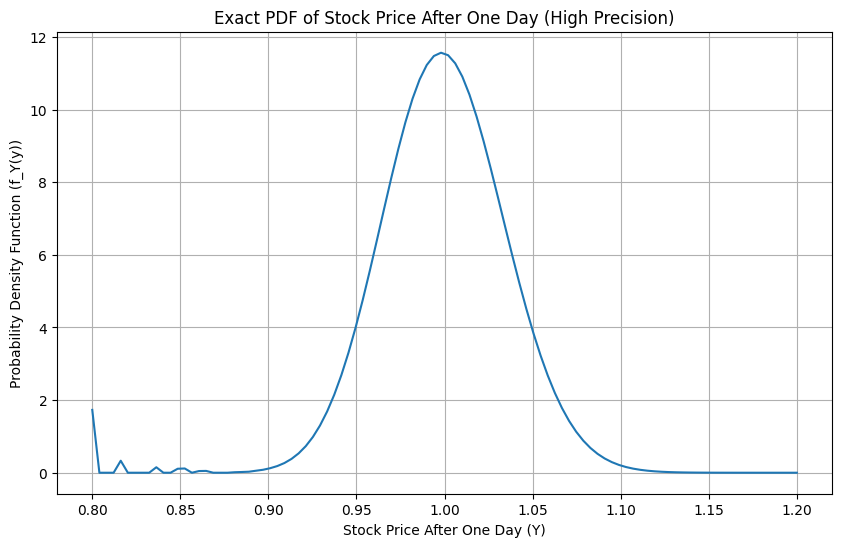

In [2]:
import numpy as np
from scipy.special import gammaln
from scipy.special import binom as binomial
from math import log, exp
import matplotlib.pyplot as plt

def compute_pdf_mellin_high_precision(y_values, n=420, a=0.999, b=1.001, p0=1.0):
    pdf_values = []
    
    for y in y_values:
        # Compute constants
        ln_a = log(a)
        ln_b = log(b)
        ln_b_a = log(b - a)
        ln_n_minus1_fact = gammaln(n)
        
        # Compute c_k for all k using high precision
        k = np.arange(0, n + 1)
        c_k = [(n - k_i) * ln_b + k_i * ln_a - log(y / p0) for k_i in k]
        
        # Only consider terms where c_k >= 0 to avoid negative logarithms
        valid_indices = [i for i, val in enumerate(c_k) if val >= 0]
        c_k = [c_k[i] for i in valid_indices]
        k = [k[i] for i in valid_indices]
        
        if not valid_indices:
            pdf_values.append(0.0)
            continue
        
        # Compute the sign of each term
        sign_terms = [(-1) ** k_i for k_i in k]
        
        # Compute the binomial coefficients and terms with high precision
        ln_abs_terms = [log(binomial(n, k_i)) + (n - 1) * log(c_k_i) for k_i, c_k_i in zip(k, c_k)]
        
        # Use the log-sum-exp trick with signs
        max_ln_abs_term = max(ln_abs_terms)
        exp_terms = [sign * exp(ln_term - max_ln_abs_term) for sign, ln_term in zip(sign_terms, ln_abs_terms)]
        total_sum = sum(exp_terms)
        
        # Compute ln(f_Y(y)) with high precision
        ln_C = -n * ln_b_a - ln_n_minus1_fact
        if total_sum == 0:
            pdf_values.append(0.0)  # The PDF is zero at this point
        else:
            ln_f_Y = ln_C + log(abs(total_sum)) + max_ln_abs_term
            # Ensure non-negative PDF
            f_Y = exp(ln_f_Y) if total_sum > 0 else 0.0
            pdf_values.append(float(f_Y))
    
    return np.array(pdf_values)

# Parameters
p0 = 1.0  # Initial stock price
n = 35
a = 0.99
b = 1.01

# Generate y values around p0
y_values = np.linspace(p0 * 0.8, p0 * 1.2, 100)
pdf_values = compute_pdf_mellin_high_precision(y_values, n=n, a=a, b=b, p0=p0)

# Normalize the PDF so the total area is 1
total_area = np.trapz(pdf_values, y_values)
pdf_values /= total_area

# Plot the PDF
plt.figure(figsize=(10, 6))
plt.plot(y_values, pdf_values)
plt.xlabel('Stock Price After One Day (Y)')
plt.ylabel('Probability Density Function (f_Y(y))')
plt.title('Exact PDF of Stock Price After One Day (High Precision)')
plt.grid(True)
plt.show()


To get around the numberical instability, we can instead reformulate the problem with Fourier transforms. This will allow us to use the fast Fourier transform to compute the distribution of the stock value.

$$ \displaystyle \mathcal{F}\{f(x_1)f(x_2) \cdots f(x_{420})\} = \mathcal{F}\{f(x_1)\} \cdot \mathcal{F}\{f(x_2)\} \cdots \mathcal{F}\{f(x_{420})\} = \mathcal{F}\{f(x_i)\}^{420} $$

It will help to first tranform the distribution $ \displaystyle Y = \prod_{i=1}^{420} X_i \rightarrow \ln(Y) = \sum_{i=1}^{420} \ln(X_i) $

The pdf of $ \ln(X_i) $ is given by

$$ \displaystyle f_{\ln(x_i)}(t) = f_{X_i}(x) \left| \frac{dx}{dt} \right| = f_{X_i}(e^t) e^t = \frac{e^t}{b-a} \mathbb{1}_{t \in [\ln(a), \ln(b)]} $$

We first need to compute the characteristic function of $f_{\ln(x_i)} $ namely $ \phi_{\ln(x_i)} $

$$ \displaystyle \phi(s) = \int_{-\infty}^{\infty} e^{-ist} f_{x_i}(t) \, dt = \frac{1}{b-a} \int_{\ln(a)}^{\ln(b)} e^{-ist+t} \, dt = \frac{1}{b-a} \frac{e^{t(1-is)}}{1-is} \bigg|_{\ln(a)}^{\ln(b)}  = \frac{b^{1-is} - a^{1-is}}{(b-a)(1-is)} $$

$$ \displaystyle \phi_{\ln(Y)} = \phi^{420} = \left( \frac{b^{1-is} - a^{1-is}}{(b-a)(1-is)} \right)^{420} $$

Now we can compute the pdf of $ \ln(Y) $ by taking the inverse Fourier transform.

$$ \displaystyle f_{\ln(Y)}(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} e^{ist} \left( \frac{b^{1-is} - a^{1-is}}{(b-a)(1-is)} \right)^{420} \, ds $$

Transforming back to the original variable we get the pdf of $ Y $.

$$ \displaystyle f_{Y}(y) = \frac{1}{2\pi} \int_{-\infty}^{\infty} e^{it \ln(y)} \left( \frac{b^{1-it} - a^{1-it}}{(b-a)(1-it)} \right)^{420} \, dt $$

Instead of evaluating this integral directly, we can use the fast Fourier transform to compute the distribution of the stock value.

In [3]:
def simulate_stock_prices(n_simulations, n=420, a=0.999, b=1.001, p0=1.0):
    # Simulate stock prices
    simulated_prices = np.random.uniform(a, b, (n_simulations, n)).prod(axis=1) * p0
    return simulated_prices

def compute_empirical_pdf(simulated_prices, y_values, bins=100):
    # Compute histogram
    hist, bin_edges = np.histogram(simulated_prices, bins=bins, density=True)
    # Compute bin centers
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    return bin_centers, hist

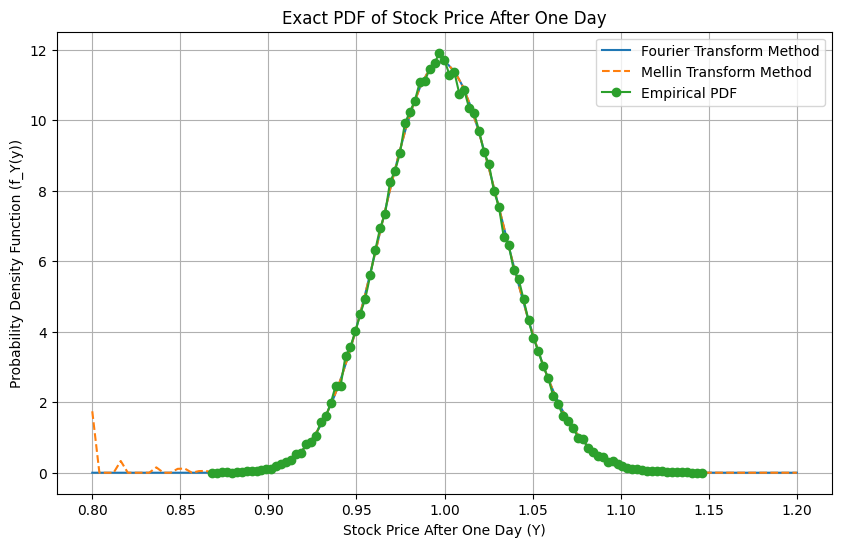

Numerical estimate of the area under the Fourier Transform curve: 0.9999999886536338
Numerical estimate of the area under the Mellin Transform curve: 1.0067289417999539


In [24]:
import numpy as np
from scipy.integrate import quad
import warnings

def compute_pdf(y_values, p0, n, a, b):
    """
    Computes the pdf of the stock price after n steps.
    
    Parameters:
    y_values : array_like
        Array of stock prices at which to compute the pdf.
    p0 : float
        Initial stock price.
    n : int
        Number of steps (e.g., number of minutes in a day).
    a : float
        Lower bound of the uniform distribution of δ.
    b : float
        Upper bound of the uniform distribution of δ.
    
    Returns:
    pdf_values : ndarray
        Array of pdf values corresponding to y_values.
    """
    # Suppress warnings for numerical integration
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    
    # Compute z1 and z2 for use in characteristic function
    ln_a = np.log(a)
    ln_b = np.log(b)
    delta = b - a
    
    # Define the characteristic function of ln(1 + δ)
    def phi_delta(t):
        numerator = (b * np.exp(1j * t * ln_b) - a * np.exp(1j * t * ln_a))
        denominator = (1 + 1j * t) * delta
        return numerator / denominator

    # Raise phi_delta to the power n to get the characteristic function of S_n
    def phi_s(t):
        return phi_delta(t) ** n

    # Function to compute the integrand for numerical integration
    def integrand(t, s):
        return np.real(phi_s(t) * np.exp(-1j * t * s))
    
    # Set the integration limits
    T = 1000  # Adjust T as needed for convergence
    pdf_values = np.zeros_like(y_values, dtype=np.float64)
    
    for idx, y in enumerate(y_values):
        s = np.log(y / p0)
        # Perform numerical integration
        result, _ = quad(integrand, -T, T, args=(s,), limit=100000)
        pdf_Sn = result / (2 * np.pi)
        pdf_Pn = pdf_Sn / y  # Adjust for the change of variables
        pdf_values[idx] = pdf_Pn
    
    return pdf_values


# Example usage
p0 = 1.0  # Initial stock price
n=35
a=.99
b=1.01
n_simulations = 100000  # Number of simulations
y_values = np.linspace(0.8, 1.2, 100)
pdf_values = compute_pdf(y_values, n=n, a=a, b=b, p0=p0)

# Simulate stock prices
simulated_prices = simulate_stock_prices(n_simulations, n=n, a=a, b=b, p0=p0)

# Compute empirical PDF
bin_centers, empirical_pdf = compute_empirical_pdf(simulated_prices, y_values)

# Compute PDF using Mellin transform with high precision
pdf_values_mellin = compute_pdf_mellin_high_precision(y_values, n=n, a=a, b=b, p0=p0)

# Normalize the Mellin PDF so the total area is 1
total_area_mellin = np.trapz(pdf_values_mellin, y_values)

# Plot the PDFs
plt.figure(figsize=(10, 6))
plt.plot(y_values, pdf_values, label='Fourier Transform Method')
plt.plot(y_values, pdf_values_mellin, label='Mellin Transform Method', linestyle='--')
plt.plot(bin_centers, empirical_pdf, label='Empirical PDF', linestyle='-', marker='o')
plt.xlabel('Stock Price After One Day (Y)')
plt.ylabel('Probability Density Function (f_Y(y))')
plt.title('Exact PDF of Stock Price After One Day')
plt.legend()
plt.grid(True)
plt.show()

# Print numerical estimates of the area under each curve
area_fourier = np.trapz(pdf_values, y_values)
area_mellin = np.trapz(pdf_values_mellin, y_values)
print(f"Numerical estimate of the area under the Fourier Transform curve: {area_fourier}")
print(f"Numerical estimate of the area under the Mellin Transform curve: {area_mellin}")

/var/folders/5j/d_pmm93d5qb7mpv0d38kkm8m0000gn/T/ipykernel_81888/880111104.py:54: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  result, _ = quad(integrand, -T, T, args=(s,), limit=100000)


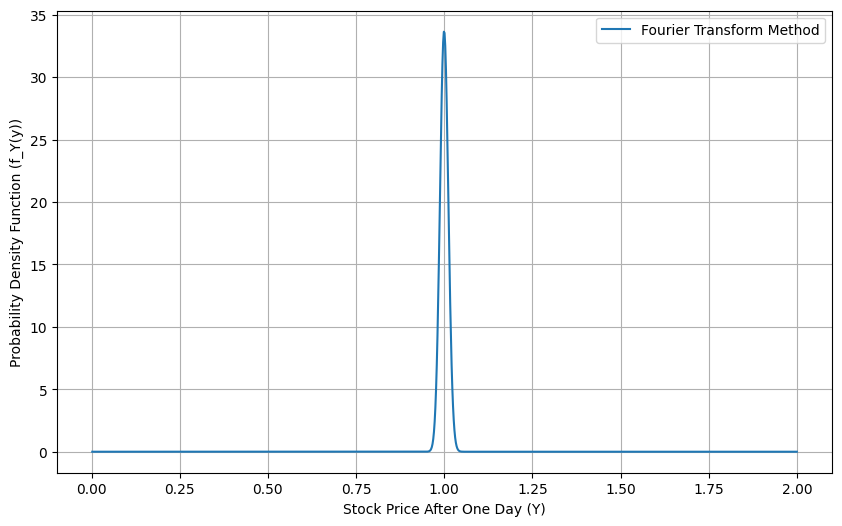

In [26]:
# Example usage
p0 = 1.0  # Initial stock price
n=420
a=.999
b=1.001
y_values = np.linspace(0.0, 2, 1000)
pdf_values = compute_pdf(y_values, n=n, a=a, b=b, p0=p0)

plt.figure(figsize=(10, 6))
plt.plot(y_values, pdf_values, label='Fourier Transform Method')

plt.xlabel('Stock Price After One Day (Y)')
plt.ylabel('Probability Density Function (f_Y(y))')
plt.legend()
plt.grid(True)
plt.show()